In [1]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
ls


 PriscillaDay3AM.ipynb
David.ipynb
Davis-Pris API.ipynb
Pris - exploring actors on full df.ipynb
Pris-  exploring actors.ipynb
Pris- exploring Directors full df.ipynb
Pris- exploring genres-Copy1.ipynb
Pris- exploring genres-Copy2.ipynb
Pris- exploring genres.ipynb
Priscilla - exploring Regex.ipynb
Priscilla -API fetching .ipynb
Untitled.ipynb
Untitled1.ipynb
renato_call_data.ipynb


In [3]:
full_data_merged = pd.read_csv("./../raw_data/merged_movies_by_index.csv")
full_data_merged

,avg_review_score,n_reviews,year,title,Title,Year,Rated,Released,Runtime,Genre,...,Response,Internet Movie Database,Index_match,DVD,BoxOffice,Production,Website,Rotten Tomatoes,Metacritic,Ratings
0,3.749543,547,2003,Dinosaur Planet,Dinosaur Planet,2003,NaN,14 Dec 2003,50 min,"Documentary, Animation, Family",...,True,7.7/10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.641153,2012,1997,Character,Character,1997,R,27 Mar 1998,122 min,"Crime, Drama, Mystery",...,True,7.7/10,3,04 Feb 2003,"$623,983",Almerica Film,NaN,92%,NaN,NaN
2,3.084396,1019,1997,Sick,Sick,1997,Not Rated,07 Nov 1997,90 min,Documentary,...,True,7.5/10,6,15 Feb 2017,"$116,806",Sick-the Life and Death of Bob Flanagan-Superm...,NaN,91%,82/100,NaN
3,2.129032,93,1992,8 Man,8 Man,1992,NaN,NaN,83 min,"Action, Sci-Fi",...,True,5.4/10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.417582,546,1947,My Favorite Brunette,My Favorite Brunette,1947,Passed,04 Apr 1947,87 min,"Comedy, Crime, Mystery, Romance, Thriller",...,True,6.8/10,12,10 Mar 2016,NaN,"Paramount Pictures, Hope Enterprises",NaN,75%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10381,3.411855,1957,1978,Interiors,Interiors,1978,PG,06 Oct 1978,92 min,Drama,...,True,7.4/10,17763,02 Feb 2017,"$10,432,366",Rollins-Joffe Productions,NaN,79%,67/100,NaN
10382,3.867112,64957,1998,Shakespeare in Love,Shakespeare in Love,1998,R,08 Jan 1999,123 min,"Comedy, Drama, History, Romance",...,True,7.1/10,17764,21 Apr 2016,"$100,317,794","Miramax Films, Bedford Falls Productions, Univ...",NaN,92%,87/100,NaN
10383,2.839207,1362,2000,Epoch,Epoch,2001,PG-13,24 Nov 2001,96 min,"Sci-Fi, Thriller",...,True,5.0/10,17768,25 Jan 2017,NaN,Metro-Goldwyn-Mayer,NaN,16%,NaN,NaN
10384,2.498592,6749,2003,The Company,The Company,2003,PG-13,20 May 2004,112 min,"Drama, Music, Romance",...,True,6.3/10,17769,16 Apr 2012,"$2,283,914","First Snow Production, Capitol Films, Sandcast...",NaN,72%,73/100,NaN


In [4]:
full_data_merged.columns


Index(['avg_review_score', 'n_reviews', 'year', 'title', 'Title', 'Year',
       'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'totalSeasons', 'Response',
       'Internet Movie Database', 'Index_match', 'DVD', 'BoxOffice',
       'Production', 'Website', 'Rotten Tomatoes', 'Metacritic', 'Ratings'],
      dtype='object')

In [5]:
full_data_merged.Genre[0]

'Documentary, Animation, Family'

In [19]:
full_data_merged['Director'] = full_data_merged["Director"].fillna('N/A')

In [20]:
df = full_data_merged[["Title", "Director"]].copy()
df

,Title,Director
0,Dinosaur Planet,N/A
1,Character,Mike van Diem
2,Sick,Kirby Dick
3,8 Man,Yasuhiro Horiuchi
4,My Favorite Brunette,Elliott Nugent
...,...,...
10381,Interiors,Woody Allen
10382,Shakespeare in Love,John Madden
10383,Epoch,Matt Codd
10384,The Company,Robert Altman


In [21]:
df = full_data_merged[["Title", "Director"]].copy()

df["director_list"] = df["Director"].str.split(", ") #.apply(lambda x : x.split(", "))
df

,Title,Director,director_list
0,Dinosaur Planet,N/A,[N/A]
1,Character,Mike van Diem,[Mike van Diem]
2,Sick,Kirby Dick,[Kirby Dick]
3,8 Man,Yasuhiro Horiuchi,[Yasuhiro Horiuchi]
4,My Favorite Brunette,Elliott Nugent,[Elliott Nugent]
...,...,...,...
10381,Interiors,Woody Allen,[Woody Allen]
10382,Shakespeare in Love,John Madden,[John Madden]
10383,Epoch,Matt Codd,[Matt Codd]
10384,The Company,Robert Altman,[Robert Altman]


In [22]:
df_explode = df.explode(column = "director_list")
df_explode

,Title,Director,director_list
0,Dinosaur Planet,N/A,N/A
1,Character,Mike van Diem,Mike van Diem
2,Sick,Kirby Dick,Kirby Dick
3,8 Man,Yasuhiro Horiuchi,Yasuhiro Horiuchi
4,My Favorite Brunette,Elliott Nugent,Elliott Nugent
...,...,...,...
10381,Interiors,Woody Allen,Woody Allen
10382,Shakespeare in Love,John Madden,John Madden
10383,Epoch,Matt Codd,Matt Codd
10384,The Company,Robert Altman,Robert Altman


In [23]:
df_explode["director_proc"] = df_explode["director_list"].str.lower().str.split(" ").apply(lambda x: " ".join(sorted(x)))

In [24]:
director_dict = {}
for director in df_explode["director_proc"]:
    director_dict[director] = director_dict.get(director, 0) +1
director_dict

{'n/a': 614,
 'diem mike van': 1,
 'dick kirby': 2,
 'horiuchi yasuhiro': 1,
 'elliott nugent': 1,
 'dwight hemion': 1,
 'israelson peter': 3,
 'christian duguay': 6,
 'fellows simon': 2,
 'bernard rose': 2,
 'ramesh sippy': 3,
 'paul seed': 1,
 'burrows stephen': 1,
 'dickerson ernest r.': 9,
 'clark johnson': 2,
 'meyers nancy': 3,
 'bob smeaton': 7,
 'phil robinson': 1,
 'david marshall(co-director)': 1,
 'kimiyoshi yasuda': 1,
 'r. smyth thomas': 2,
 'drew johnson': 1,
 'myra paci': 1,
 'david lee zlotoff': 1,
 'chan ho-sun peter': 4,
 'larry roemer': 1,
 'minnelli vincente': 12,
 'henry king': 9,
 'green sam': 1,
 'bill siegel(co-director)': 1,
 'brett kelly': 1,
 'edmund goulding': 8,
 'friedkin william': 8,
 'babenco hector': 1,
 'loncraine richard': 5,
 'cohen rob': 7,
 'jing wong': 7,
 'bruce gowers': 8,
 'archie mayo': 4,
 'iii jay julia pierrepont': 1,
 'nicolaou ted': 3,
 'freida lee mock': 1,
 'mikhalkov nikita': 2,
 'pen-ek ratanaruang': 2,
 'frank marshall': 3,
 'brian l

In [26]:
df_director = pd.DataFrame(director_dict.values()).T
df_director.columns=director_dict.keys()
df_director.plot(kind="bar")

<AxesSubplot:>

Error in callback <function flush_figures at 0x142b51700> (for post_execute):


KeyboardInterrupt: 

(array([5.425e+03, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([  1.  ,  25.52,  50.04,  74.56,  99.08, 123.6 , 148.12, 172.64,
        197.16, 221.68, 246.2 , 270.72, 295.24, 319.76, 344.28, 368.8 ,
        393.32, 417.84, 442.36, 466.88, 491.4 , 515.92, 540.44, 564.96,
        589.48, 614.  ]),
 <BarContainer object of 25 artists>)

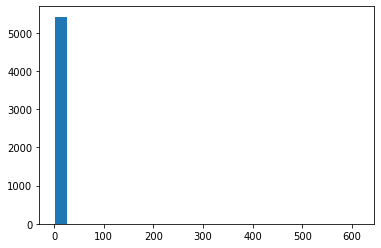

In [29]:
import matplotlib.pyplot as plt
plt.hist(director_dict.values(), bins = 25)